In [12]:
import sklearn
print(sklearn.__version__)


1.5.0


In [13]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd

In [117]:
# Cargar el conjunto de datos de ejemplo (iris)
data = pd.read_csv('Dataset_medio_limpio_filtrado.csv')
X = data[['Age', 'Fever', 'Difficulty Breathing', 'Cholesterol Level']]
y = data[['Disease']]

In [130]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [131]:
# Crear el modelo de árbol de decisiones
arbol = DecisionTreeClassifier()

In [132]:
# Entrenar el modelo con los datos de entrenamiento
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
# Realizar predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

In [134]:
from sklearn.model_selection import cross_val_score

# Realizar una validación cruzada de 5 pliegues
precisiones = cross_val_score(arbol, X, y, cv=5, scoring='accuracy')

print(f'Las precisiones obtenidas en cada pliegue son: {precisiones}')
print(f'La precisión media es: {precisiones.mean()}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Las precisiones obtenidas en cada pliegue son: [0.0625     0.         0.06451613 0.09677419 0.09677419]
La precisión media es: 0.06411290322580646


In [135]:
depths = range(1, 40)  # Vamos a probar profundidades de 1 a 20
accuracies = []

# Entrenar y evaluar el modelo para cada profundidad
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Depth: {depth}, Accuracy: {accuracy}')

Depth: 1, Accuracy: 0.0425531914893617
Depth: 2, Accuracy: 0.06382978723404255
Depth: 3, Accuracy: 0.06382978723404255
Depth: 4, Accuracy: 0.0425531914893617
Depth: 5, Accuracy: 0.0425531914893617
Depth: 6, Accuracy: 0.0425531914893617
Depth: 7, Accuracy: 0.0425531914893617
Depth: 8, Accuracy: 0.0425531914893617
Depth: 9, Accuracy: 0.02127659574468085
Depth: 10, Accuracy: 0.02127659574468085
Depth: 11, Accuracy: 0.02127659574468085
Depth: 12, Accuracy: 0.02127659574468085
Depth: 13, Accuracy: 0.02127659574468085
Depth: 14, Accuracy: 0.02127659574468085
Depth: 15, Accuracy: 0.02127659574468085
Depth: 16, Accuracy: 0.02127659574468085
Depth: 17, Accuracy: 0.02127659574468085
Depth: 18, Accuracy: 0.02127659574468085
Depth: 19, Accuracy: 0.02127659574468085
Depth: 20, Accuracy: 0.02127659574468085
Depth: 21, Accuracy: 0.02127659574468085
Depth: 22, Accuracy: 0.02127659574468085
Depth: 23, Accuracy: 0.02127659574468085
Depth: 24, Accuracy: 0.02127659574468085
Depth: 25, Accuracy: 0.02127659

Nivel de profundidad 6
Precisión: 70%

In [115]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.6166666666666667


[Text(0.5311631944444445, 0.9583333333333334, 'x[3] <= 1.5\ngini = 0.499\nsamples = 239\nvalue = [113.0, 126.0]'),
 Text(0.2512152777777778, 0.875, 'x[1] <= 0.5\ngini = 0.46\nsamples = 123\nvalue = [79, 44]'),
 Text(0.3911892361111111, 0.9166666666666667, 'True  '),
 Text(0.15555555555555556, 0.7916666666666666, 'x[0] <= 53.5\ngini = 0.354\nsamples = 61\nvalue = [47, 14]'),
 Text(0.09444444444444444, 0.7083333333333334, 'x[0] <= 41.0\ngini = 0.278\nsamples = 42\nvalue = [35, 7]'),
 Text(0.05555555555555555, 0.625, 'x[0] <= 38.5\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(0.03333333333333333, 0.5416666666666666, 'x[0] <= 29.5\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.022222222222222223, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.044444444444444446, 0.4583333333333333, 'x[0] <= 36.5\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.03333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.022222

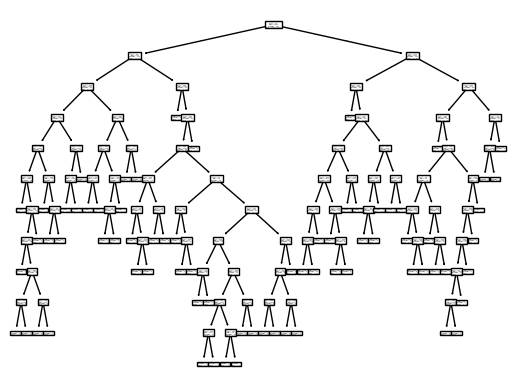

In [116]:
# Visualizar el árbol de decisiones
plot_tree(arbol)